<a href="https://colab.research.google.com/github/stwind/gan-experiments/blob/master/notebooks/ssim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uq torchinfo git+https://github.com/stwind/gan-experiments.git

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as tfms
from torchvision.utils import make_grid
from torchinfo import summary
from fastprogress.fastprogress import progress_bar

import ganexp.functional as gF
import ganexp.utils as utils
from ganexp.nn import SSIM, MSSSIM

sns.set('notebook', 'darkgrid', rc={
    'font.family': ['DejaVu Sans'],
    'font.sans-serif': ['Open Sans', 'Arial Unicode MS'],
    'font.size': 12,
    'figure.figsize': (8, 5),
    'grid.linewidth': 1,
    'grid.alpha': 0.5,
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.framealpha': 0.6,
    'legend.handletextpad': 0.2,
    'lines.linewidth': 1,
    'axes.facecolor': '#fafafa',
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'axes.linewidth': 0.5,
    'xtick.labelsize': 11,
    'xtick.major.width': 0.5,
    'ytick.labelsize': 11,
    'ytick.major.width': 0.5,
    'figure.titlesize': 13,
})
plt.style.use("dark_background")

print("Infos:")
print("numpy: {}".format(np.__version__))
print("seaborn: {}".format(sns.__version__))
print("matplotlib: {}".format(mpl.__version__))
print("pytorch: {}".format(torch.__version__))
for i in range(torch.cuda.device_count()):
    print("cuda device #{}: {}".format(i, torch.cuda.get_device_name(i)))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("current device type: {}".format(device.type))

Infos:
numpy: 1.19.5
seaborn: 0.11.1
matplotlib: 3.2.2
pytorch: 1.7.0+cu101
current device type: cpu


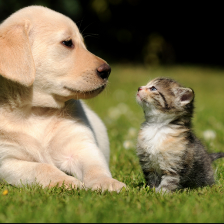

In [ ]:
image = utils.fetch_image("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")
image

## SSIM

In [ ]:
img1 = tfms.functional.to_tensor(image).unsqueeze(0)
img2 = torch.rand_like(img1).requires_grad_(True)

In [ ]:
num_epochs = 180

results = []
ssim_vals = []

loss_fn = SSIM(3, 1.0)
optimizer = torch.optim.Adam([img2], lr=0.03)

for epoch in progress_bar(range(num_epochs)):
    optimizer.zero_grad()
    loss = -loss_fn(img1, img2)
    loss.backward()
    optimizer.step()
    
    if epoch % (num_epochs // 10) == 0:
        ssim_val = gF.ssim(img1, img2).item()
        print("[{}/{}] loss: {:.4f} ssim: {:.4f}".format(
            epoch, num_epochs, loss.item(), ssim_val))
        
        results.append(img2.detach().clone())
        ssim_vals.append(ssim_val)

[0/180] loss: -0.0076 ssim: 0.0240
[18/180] loss: -0.3585 ssim: 0.3872
[36/180] loss: -0.7820 ssim: 0.7919
[54/180] loss: -0.8864 ssim: 0.8892
[72/180] loss: -0.9271 ssim: 0.9282
[90/180] loss: -0.9455 ssim: 0.9464
[108/180] loss: -0.9601 ssim: 0.9609
[126/180] loss: -0.9774 ssim: 0.9780
[144/180] loss: -0.9906 ssim: 0.9913
[162/180] loss: -0.9966 ssim: 0.9968


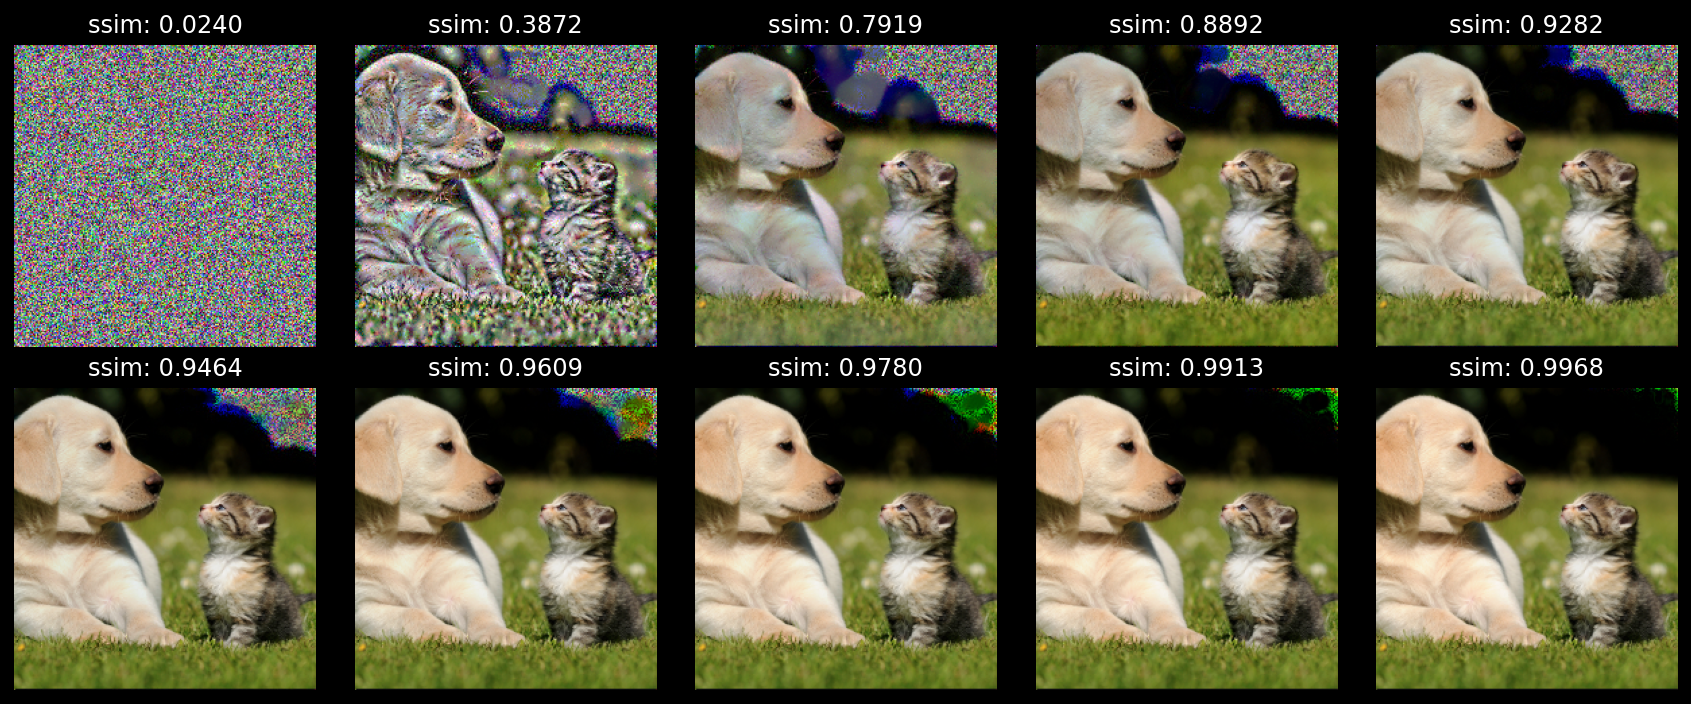

In [ ]:
fig = plt.figure(figsize=(12,5))

for i, (img, ssim_val) in enumerate(zip(results,ssim_vals)):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(img.squeeze(0).permute(1,2,0).clip(0,1))
    ax.set_axis_off()
    ax.set_title("ssim: {:.4f}".format(ssim_val))
    
plt.tight_layout()
plt.show()

## MS-SSIM

In [ ]:
img1 = tfms.functional.to_tensor(image).unsqueeze(0)
img2 = torch.rand_like(img1).requires_grad_(True)

In [ ]:
num_epochs = 180

results = []
ssim_vals = []

loss_fn = MSSSIM(3, 1.0)
optimizer = torch.optim.Adam([img2], lr=0.03)

for epoch in progress_bar(range(num_epochs)):
    optimizer.zero_grad()
    loss = -loss_fn(img1, img2)
    loss.backward()
    optimizer.step()
    
    if epoch % (num_epochs // 10) == 0:
        ssim_val = gF.ssim_multiscale(img1, img2).item()
        print("[{}/{}] loss: {:.4f} msssim: {:.4f}".format(
            epoch, num_epochs, loss.item(), ssim_val))
        
        results.append(img2.detach().clone())
        ssim_vals.append(ssim_val)

[0/180] loss: -0.0486 msssim: 0.1640
[18/180] loss: -0.7715 msssim: 0.7822
[36/180] loss: -0.9011 msssim: 0.9054
[54/180] loss: -0.9477 msssim: 0.9492
[72/180] loss: -0.9661 msssim: 0.9667
[90/180] loss: -0.9750 msssim: 0.9754
[108/180] loss: -0.9799 msssim: 0.9801
[126/180] loss: -0.9832 msssim: 0.9834
[144/180] loss: -0.9858 msssim: 0.9859
[162/180] loss: -0.9878 msssim: 0.9879


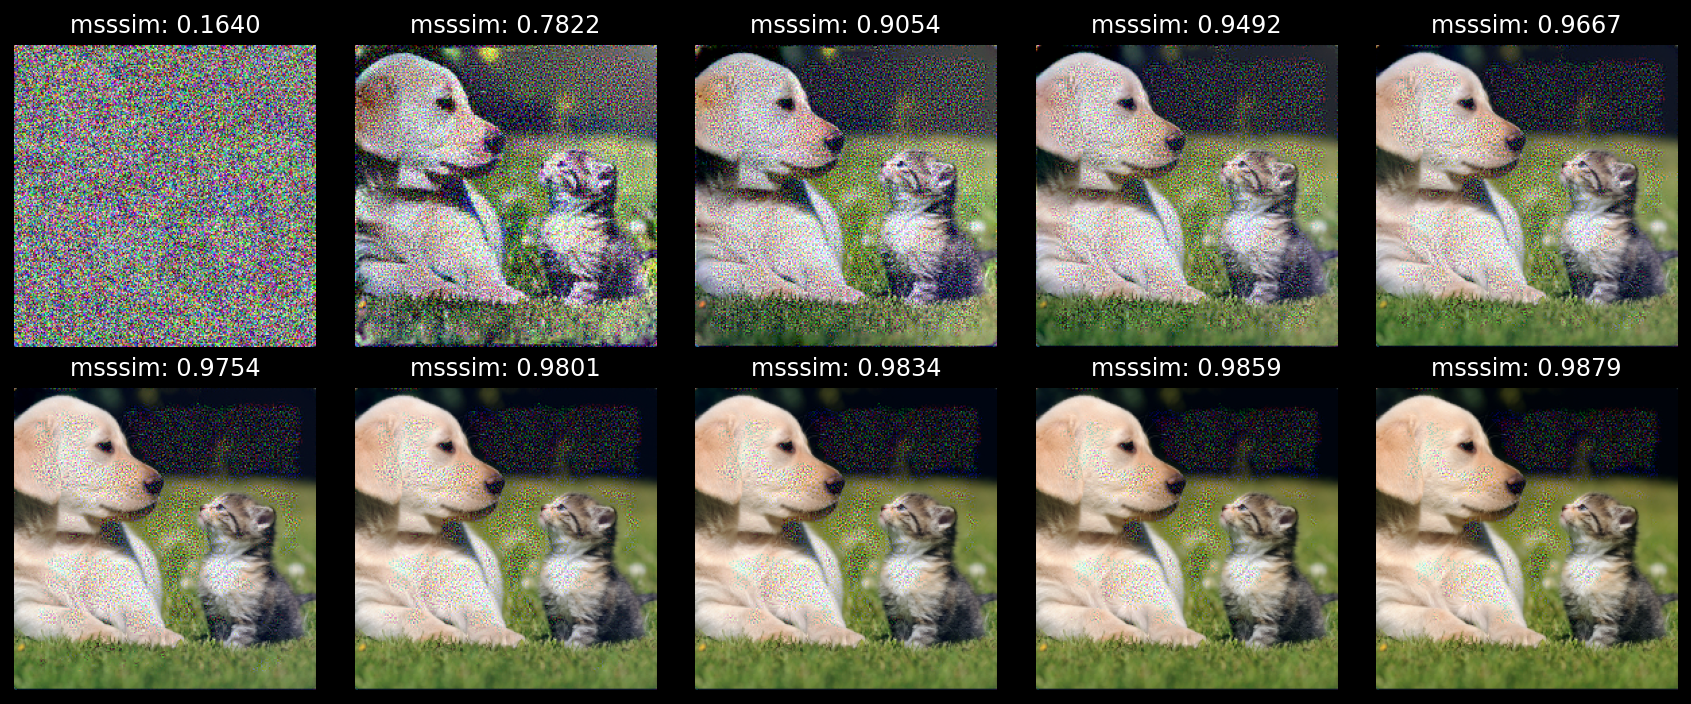

In [ ]:
fig = plt.figure(figsize=(12,5))

for i, (img, ssim_val) in enumerate(zip(results,ssim_vals)):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(img.squeeze(0).permute(1,2,0).clip(0,1))
    ax.set_axis_off()
    ax.set_title("msssim: {:.4f}".format(ssim_val))
    
plt.tight_layout()
plt.show()